# Laboratorio 2 de Dinámica
## Análisis de Datos Experimentales
### Importar paquetes y configurar gráficos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

### Importar datos

In [14]:
subida = pd.read_csv("subida.tsv", sep="\t", decimal=",").fillna(0)
bajada = pd.read_csv("bajada.tsv", sep="\t", decimal=",").fillna(0)

### Calcular aceleración numéricamente

In [15]:
subida["Aceleración (m/s²)"] = subida["Velocidad (m/s)"].diff()/subida["Tiempo (s)"].diff()
bajada["Aceleración (m/s²)"] = bajada["Velocidad (m/s)"].diff()/subida["Tiempo (s)"].diff()

### Categorizar y unir

In [16]:
subida["Movimiento"] = ["subida" for i in range(0, len(subida))]
bajada["Movimiento"] = ["bajada" for i in range(0, len(bajada))]
datos = pd.concat([subida, bajada])

### Análisis de valores

In [20]:
print(subida["Aceleración (m/s²)"].max())
print(round(bajada["Aceleración (m/s²)"].min(), 2))

2.64
-1.92


### Gráfico de scatter

<AxesSubplot:xlabel='Tiempo (s)', ylabel='Fuerza (N)'>

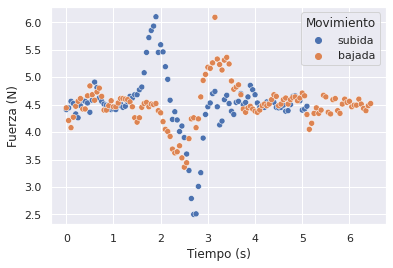

In [17]:
sns.scatterplot(x="Tiempo (s)", y="Fuerza (N)", data=datos, hue="Movimiento")

### Generar gráficos de linea

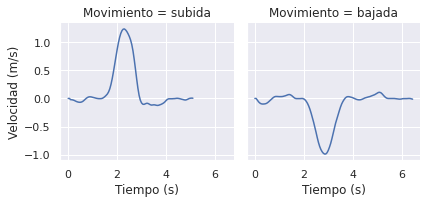

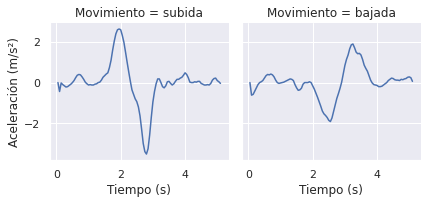

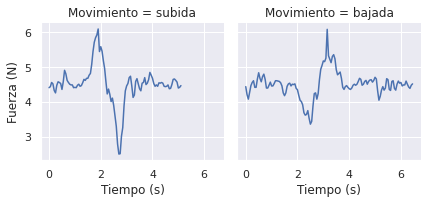

In [18]:
v = sns.FacetGrid(datos, col="Movimiento")
v.map(sns.lineplot, "Tiempo (s)", "Velocidad (m/s)", ci="sd")
v.add_legend()

a = sns.FacetGrid(datos, col="Movimiento")
a.map(sns.lineplot, "Tiempo (s)", "Aceleración (m/s²)", ci="sd")
a.add_legend()

f = sns.FacetGrid(datos, col="Movimiento")
f.map(sns.lineplot, "Tiempo (s)", "Fuerza (N)", ci="sd")
f.add_legend()